In [1]:
%load_ext autoreload
%autoreload 2

## Test safe files using max probablity classification for multi-classifer

In [2]:
import sys; sys.path.append('../')
from DataPreparing.data_preparing import *
from DataPreparing.HandleClassImbalance import *
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
# load 4 models
model1 = load_model('rbf_svm_group1_prob.pkl')
model2 = load_model('rbf_svm_group2_prob.pkl')
model3 = load_model('rbf_svm_group3_prob.pkl')
model4 = load_model('linear_svm_group4_prob.pkl')

In [4]:
X,y =read_data("../DataFiles/gcn_new_embeddings2/test/all_test.csv", drop_1st_col=True, split=False)

In [6]:
test_point = np.random.rand(1, 512)

prob1 = model1.predict_proba(test_point)[0].max()
result1=model1.classes_[ np.argmax( model1.predict_proba(test_point)[0]) ]
prob2 = model2.predict_proba(test_point)[0].max()
result2=model2.classes_[ np.argmax( model2.predict_proba(test_point)[0]) ]
prob3 = model3.predict_proba(test_point)[0].max()
result3=model3.classes_[ np.argmax( model3.predict_proba(test_point)[0]) ]
prob4 = model4.predict_proba(test_point)[0].max()
result4=model4.classes_[ np.argmax( model4.predict_proba(test_point)[0]) ]

probs =np.array( [prob1,prob2,prob3,prob4])
options= np.array([ result1, result2,result3, result4])
result =options[probs.argmax()]
print(result)


CWE122


{'CWE121': 0, 'CWE122': 1, 'CWE124': 2, 'CWE126': 3, 'CWE127': 4, 'CWE134': 5, 'CWE190': 6, 'CWE191': 7, 'CWE194': 8, 'CWE195': 9, 'CWE23': 10, 'CWE36': 11, 'CWE401': 12, 'CWE457': 13, 'CWE590': 14, 'CWE690': 15, 'CWE762': 16, 'CWE78': 17}


(100, 512)
100
(100, 512)
100
(100, 512)
100
(100, 512)
100
(100, 512)
100
(100, 512)
100
(100, 512)
100
(100, 512)
100
(100, 512)
100
(100, 512)
100
(100, 512)
100
(100, 512)
100
(100, 512)
100
(100, 512)
100
(100, 512)
100
(100, 512)
100
(100, 512)
100
(100, 512)
100


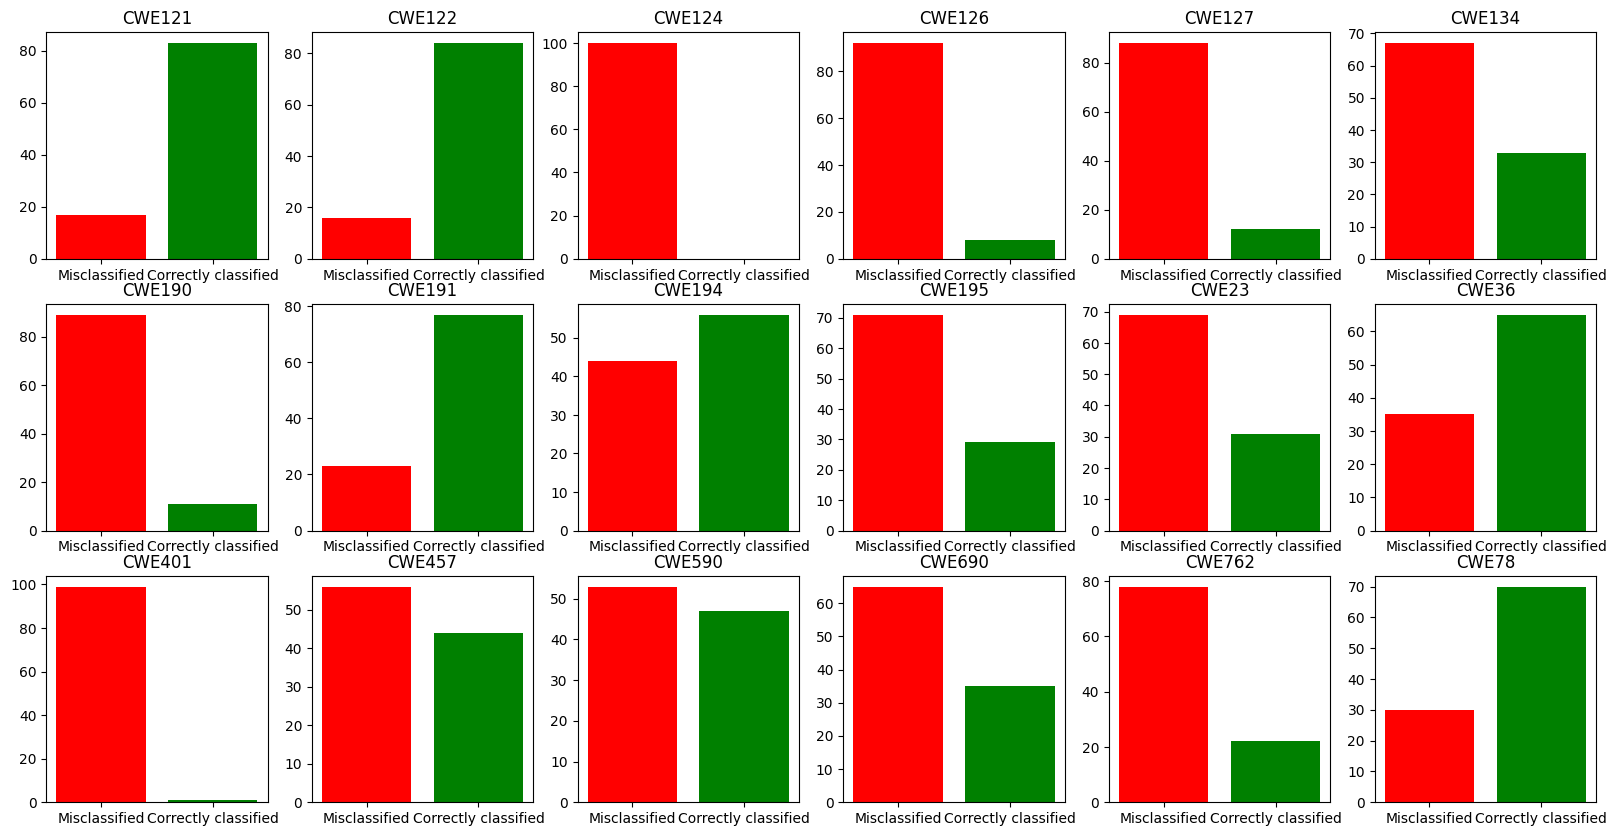

In [8]:
import matplotlib.pyplot as plt

num_classes = len(set(y))
y_encoded ,labels_dict= encode_labels(y)
print(labels_dict)

# Create a grid of subplots with 3 rows and 6 columns
fig, axs = plt.subplots(3, 6, figsize=(20, 10))

# Loop over each class
for i in range(num_classes):
    correct_points = []
    # Get indices of test points belonging to class i
    idx = np.where(y_encoded == i)[0]

    # Randomly select 100 test points from class i
    idx = np.random.choice(idx, size=100, replace=False)

    # Get predicted probabilities for each class from each model
    all_probs1 = model1.predict_proba(X[idx]) # 100 value 4 for each test point
    print(X[idx].shape)
    print(len(all_probs1))
    all_probs2 = model2.predict_proba(X[idx]) # 100 value 4 for each test point
    all_probs3 = model3.predict_proba(X[idx]) # 100 value 5 for each test point
    all_probs4 = model4.predict_proba(X[idx]) # 100 value 4 for each test point
    probs = [all_probs1, all_probs2, all_probs3, all_probs4]
    probs1 = []
    probs2 = []
    probs3 = []
    probs4 = []
    
    for k in range(len(idx)):
        probs1.append(all_probs1[k].max())
    for k in range(len(idx)):
        probs2.append(all_probs2[k].max())
    for k in range(len(idx)):
        probs3.append(all_probs3[k].max())
    for k in range(len(idx)):
        probs4.append(all_probs4[k].max())

    y_predicted1 = model1.predict(X[idx])
    y_predicted2 = model2.predict(X[idx])
    y_predicted3 = model3.predict(X[idx])
    y_predicted4 = model4.predict(X[idx])
    probs = np.stack([probs1, probs2, probs3, probs4], axis=1)

    # Find the index of the maximum probability across the 4 models for each test point
    max_indices = np.argmax(probs, axis=1) # 100 get index of clf have max prob

    # Find the index of the maximum probability across the 4 models for each test point
    max_class = np.argmax(probs, axis=1)

    for j in range(len(idx)):
        # Determine if the test point was classified correctly or not
        y_predict = -1
        if max_indices[j] == 0:
            y_predict = y_predicted1[j]
        elif max_indices[j] == 1:
            y_predict = y_predicted2[j]
        elif max_indices[j] == 2:
            y_predict = y_predicted3[j]
        elif max_indices[j] == 3:
            y_predict = y_predicted4[j]
        else:
            print("error")
            break

        if y_predict == y[idx[j]]:
            correct_points.append(1)
        else:
            correct_points.append(0)

    # Create a bar plot in the appropriate subplot
    row = i // 6
    col = i % 6
    axs[row, col].bar(['Misclassified', 'Correctly classified'], [correct_points.count(0), correct_points.count(1)], color=['red', 'green'])
    
    for key in labels_dict.keys():
        if labels_dict[key] == i:
            key_to_find = key
            break
    axs[row, col].set_title(key_to_find)

# Show the plot
plt.show()